In [0]:
library (tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [0]:
df <- data.frame(abc = 1, xyz = "a")
df$x
df[, "xyz"]
df[, c("abc", "xyz")]
class(df[, "xyz"])
class(df[, c("abc", "xyz")])

[1] a
Levels: a

[1] a
Levels: a

abc,xyz
<dbl>,<fct>
1,a


[1] "factor"

[1] "data.frame"

In [0]:
df1 <- as_tibble(df)
df1$x
class(df1[, "xyz"])
df1[, c("abc", "xyz")]

Warning message:
“Unknown or uninitialised column: 'x'.”


NULL

[1] "tbl_df"     "tbl"        "data.frame"

abc,xyz
<dbl>,<fct>
1,a


In [0]:
annoying <- tibble(
  `1` = 1:10,
  `2` = `1` * 2 + rnorm(length(`1`))
)

In [0]:
#annoying %>% .$1
annoying %>% .$`1`
annoying[["1"]]
annoying[[1]]

[1]  1  2  3  4  5  6  7  8  9 10

[1]  1  2  3  4  5  6  7  8  9 10

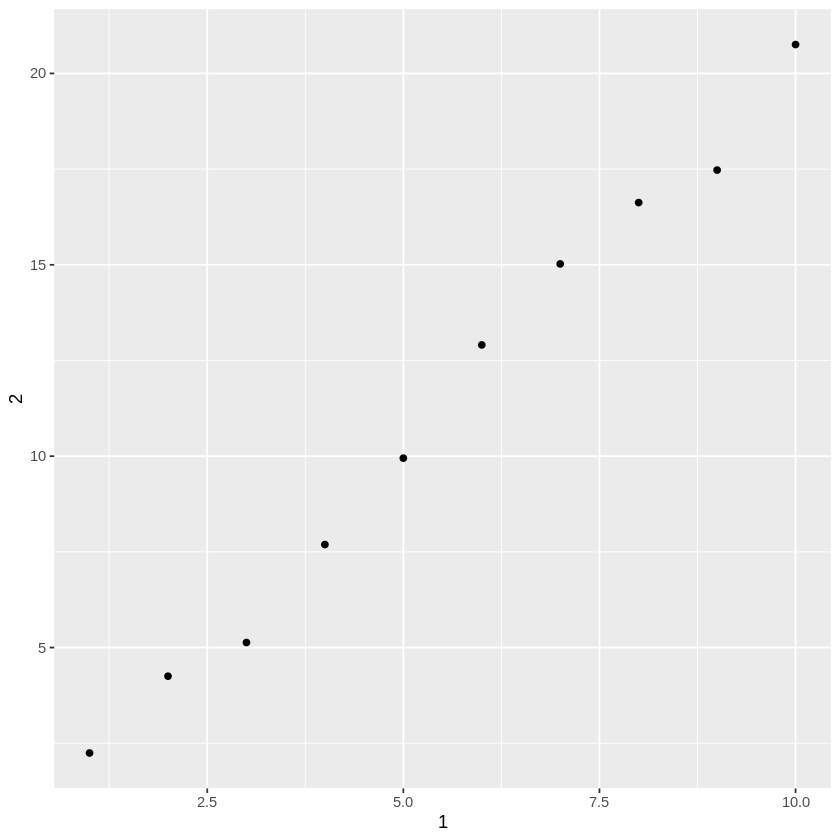

In [0]:
annoying %>%
ggplot(aes(x = `1`, y = `2`)) +
geom_point()

In [0]:
annoying <- annoying %>% mutate(`3` = `2` / `1`)
print(annoying)

# A tibble: 10 x 3
     `1`   `2`   `3`
   <int> <dbl> <dbl>
 1     1  2.25  2.25
 2     2  4.25  2.13
 3     3  5.13  1.71
 4     4  7.69  1.92
 5     5  9.95  1.99
 6     6 12.9   2.15
 7     7 15.0   2.15
 8     8 16.6   2.08
 9     9 17.5   1.94
10    10 20.8   2.08


In [0]:
annoying[["3"]] <- annoying$`2` / annoying$`1`

In [0]:
annoying %>% rename(`one` = `1`, `two` = `2`, `three` = `3`)

one,two,three
<int>,<dbl>,<dbl>
1,2.245041,2.245041
2,4.251283,2.125642
3,5.131648,1.710549
4,7.690854,1.922713
5,9.948522,1.989704
6,12.906200,2.151033
7,15.023234,2.146176
8,16.625680,2.078210
9,17.474460,1.941607


`enframe()` converts named atomic vectors or lists to one- or two-column data frames. For a list, the result will be a nested tibble with a column of type list. For unnamed vectors, the natural sequence is used as name column.

In [0]:
enframe(1:3)

name,value
<int>,<int>
1,1
2,2
3,3


In [0]:
enframe(c(a = 5, b = 7))

name,value
<chr>,<dbl>
a,5
b,7


Use the `read_delim()` function with the argument `delim="|"`.

In [0]:
read_delim("a|b|c\n1|2|3\n4|5|6", delim = "|")

a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


In [0]:
union(names(formals(read_csv)), names(formals(read_tsv)))

[1] "file"            "col_names"       "col_types"       "locale"         
 [5] "na"              "quoted_na"       "quote"           "comment"        
 [9] "trim_ws"         "skip"            "n_max"           "guess_max"      
[13] "progress"        "skip_empty_rows"

The most important argument to `read_fwf()` which reads "fixed-width formats", is `col_positions` which tells the function where data columns begin and end.


In [0]:
x <- "x,y\n1,'a,b'"
read_csv(x, quote = "'")

x,y
<dbl>,<chr>
1,"a,b"
